In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
X = dataset.iloc[:, [3, 4]].values

In [7]:
from sklearn.cluster import SpectralClustering
import numpy as np

In [9]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0)
label = clustering.fit_predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 446 with accuracies 
[1.57457135e-15 4.26495359e-06 2.74149211e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 446 instead with accuracy 
2.335481900713362e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.17955928e-15 4.26495322e-06 2.74149268e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


In [10]:
supervised=pd.DataFrame(dataset)

In [11]:
supervised['Cluster_group']=label

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


/usr/local/lib/python3.12/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


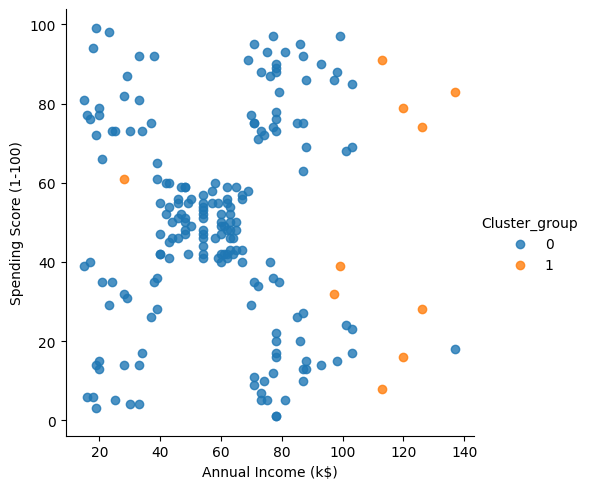

In [13]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
silhouette_avg = silhouette_score(X, label)
db_index = davies_bouldin_score(X, label)
ch_index = calinski_harabasz_score(X, label)
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index}")

Silhouette Score: 0.340
Davies-Bouldin Index: 1.333
Calinski-Harabasz Index: 18.96466618269515
